In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import math, re, os
import tensorflow as tf
print("Tensorflow version" + tf.__version__)

Tensorflow version2.18.0


In [4]:
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [5]:
base_dir = r'C:\Users\DELL\Documents\Fashion_images'
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_data = train_datagen.flow_from_directory(train_dir, 
                                               target_size=(128, 128),
                                               batch_size=32, 
                                               class_mode='binary')

valid_data = valid_datagen.flow_from_directory(valid_dir, 
                                               target_size=(128, 128),
                                               batch_size=32, 
                                               class_mode='binary')

test_data = test_datagen.flow_from_directory(test_dir, 
                                             target_size=(128, 128),
                                             batch_size=32, 
                                             class_mode='binary',
                                             shuffle=False)

Found 850 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [8]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

C:\Users\DELL\Documents\Power BI Desktop\Custom Connectors\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_data,
                    epochs=20,
                    validation_data=valid_data)

C:\Users\DELL\Documents\Power BI Desktop\Custom Connectors\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.7618 - loss: 0.5886 - val_accuracy: 0.7700 - val_loss: 0.5573
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.8129 - loss: 0.4950 - val_accuracy: 0.7700 - val_loss: 0.5481
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.8101 - loss: 0.4869 - val_accuracy: 0.7700 - val_loss: 0.6328
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.8186 - loss: 0.4933 - val_accuracy: 0.7700 - val_loss: 0.5292
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.8095 - loss: 0.4667 - val_accuracy: 0.7700 - val_loss: 0.5237
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.8059 - loss: 0.4830 - val_accuracy: 0.7700 - val_loss: 0.5663
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.8220 - loss: 0.4433 - val_accuracy: 0.7700 - val_loss: 0.5126
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.8071 - loss: 0.4718 - val_accuracy: 0.7700 - val_loss:

In [10]:
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy:.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 536ms/step - accuracy: 0.9067 - loss: 0.4217
Test Accuracy: 0.86


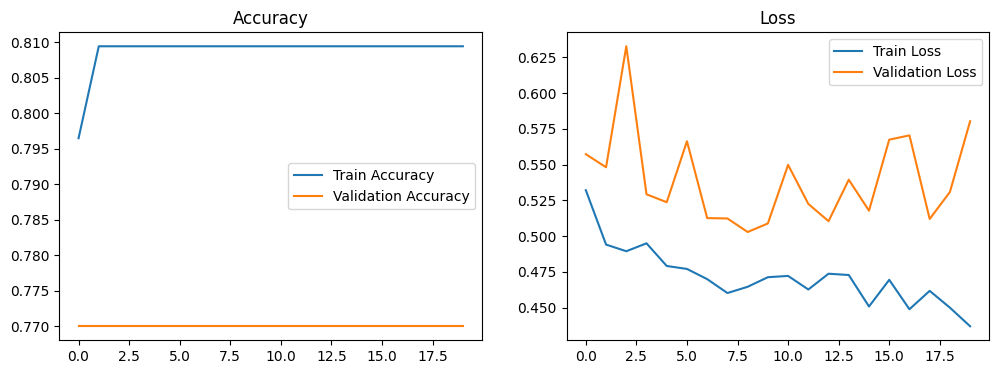

In [11]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 454ms/step


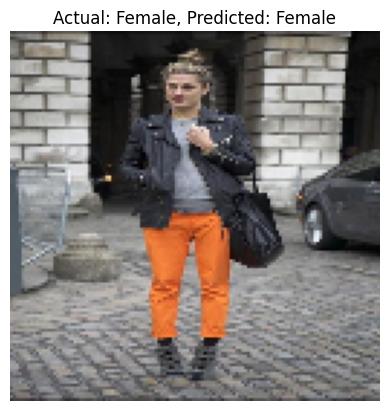

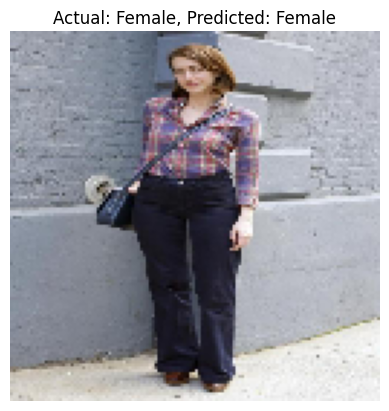

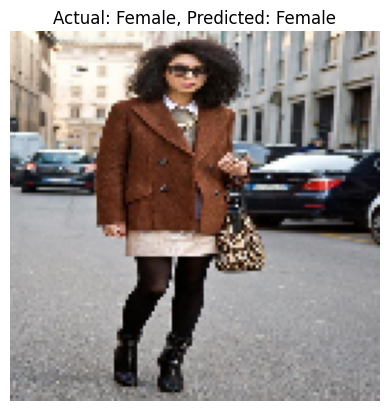

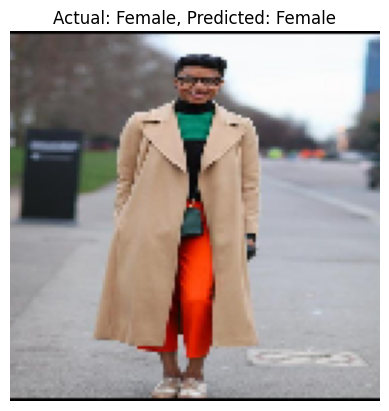

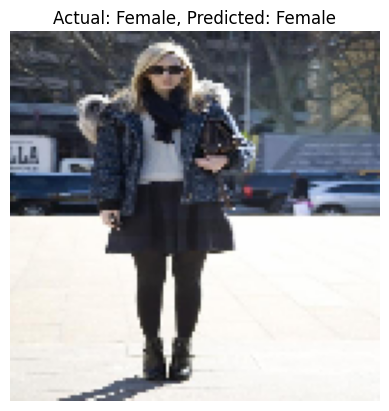

In [12]:
predictions = (model.predict(test_data) > 0.5).astype("int32")
classes = test_data.classes
labels = list(test_data.class_indices.keys())
for i in range(5):
    plt.imshow(test_data[0][0][i])
    plt.title(f"Actual: {labels[classes[i]]}, Predicted: {labels[predictions[i][0]]}")
    plt.axis('off')
    plt.show()

27/27 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step


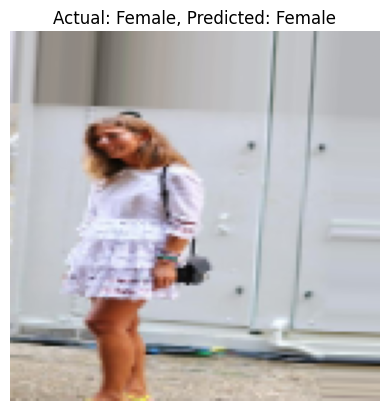

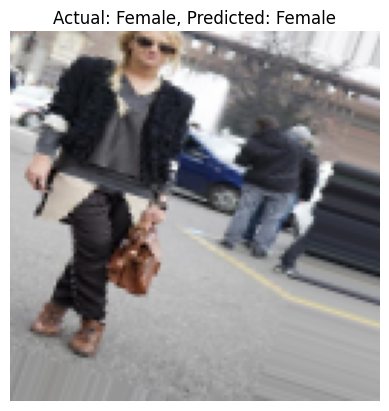

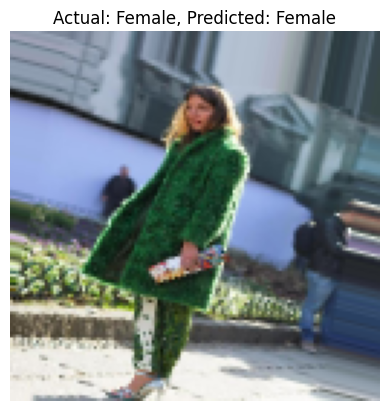

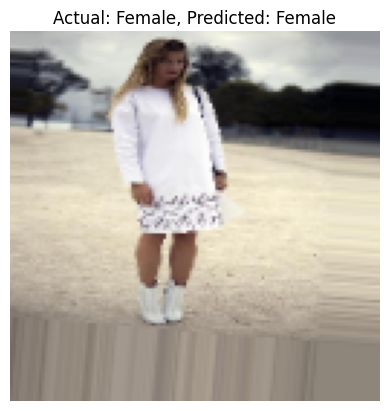

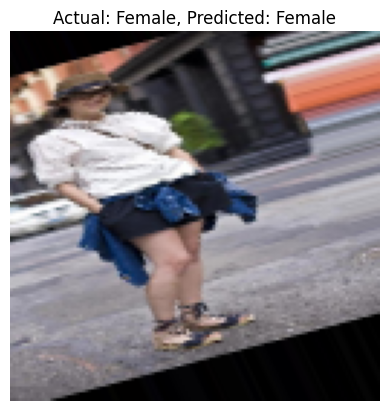

In [13]:
predictions = (model.predict(train_data) > 0.5).astype("int32")
classes = train_data.classes
labels = list(train_data.class_indices.keys())
for i in range(5):
    plt.imshow(train_data[0][0][i])
    plt.title(f"Actual: {labels[classes[i]]}, Predicted: {labels[predictions[i][0]]}")
    plt.axis('off')
    plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 515ms/step


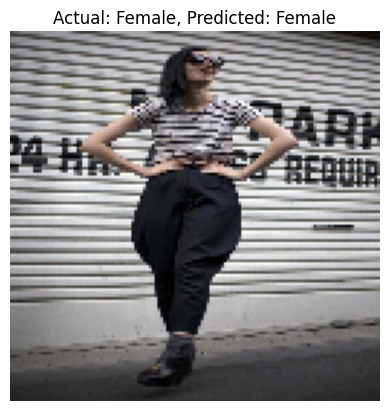

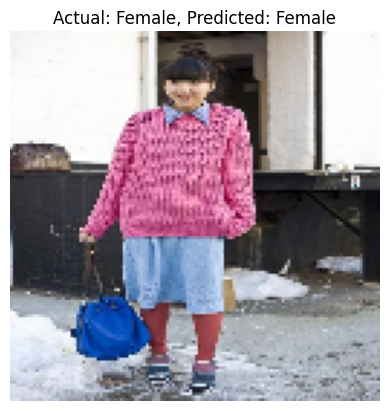

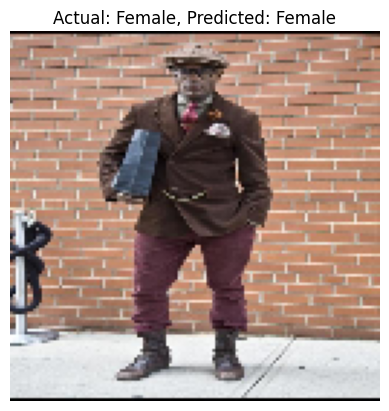

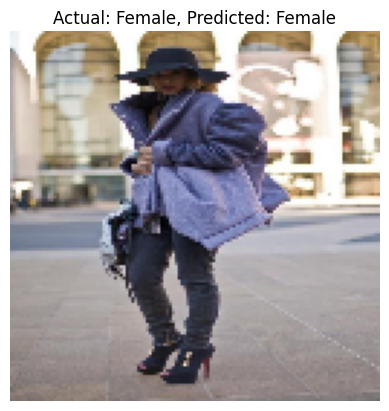

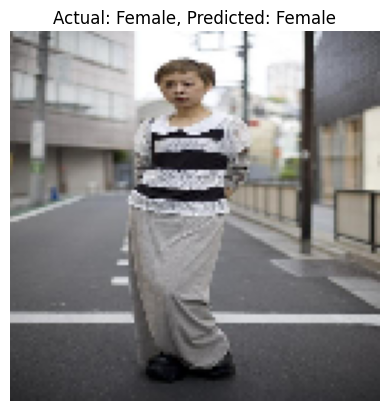

In [14]:
predictions = (model.predict(valid_data) > 0.5).astype("int32")
classes = valid_data.classes
labels = list(valid_data.class_indices.keys())
for i in range(5):
    plt.imshow(valid_data[0][0][i])
    plt.title(f"Actual: {labels[classes[i]]}, Predicted: {labels[predictions[i][0]]}")
    plt.axis('off')
    plt.show()